In [ ]:
from Diffusion_Map import diffusion_map, create_dataset_subtask1, visualize_dataset, plot_eigenValues
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

### Task 2.1

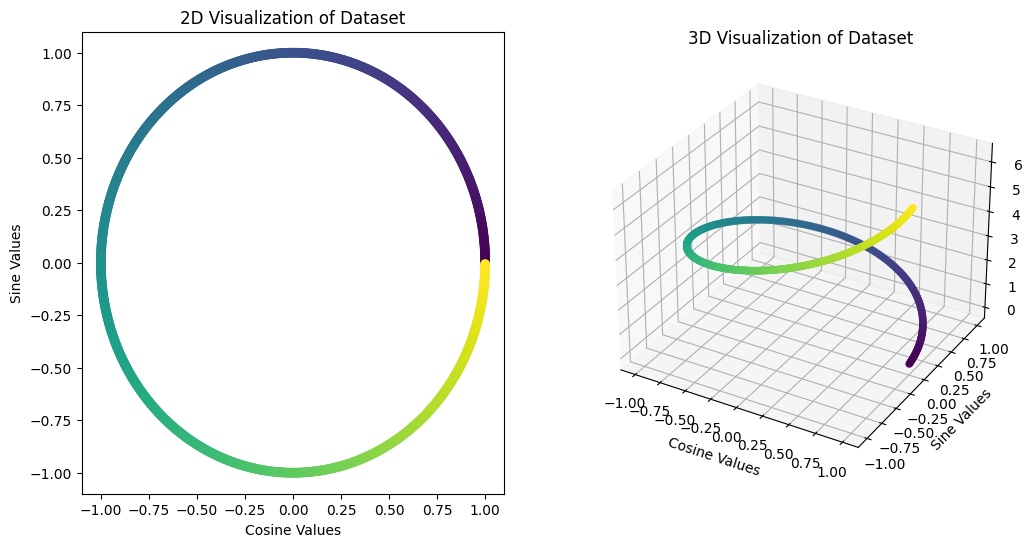

In [2]:
X,tk = create_dataset_subtask1(1000)
visualize_dataset(X, tk)

In [3]:
print(type(lambda_l[0]))

NameError: name 'lambda_l' is not defined

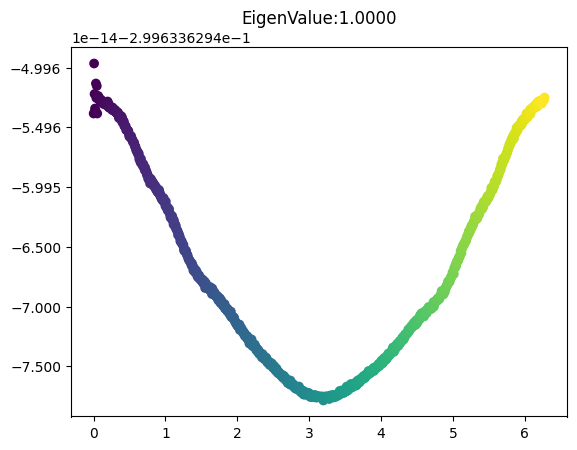

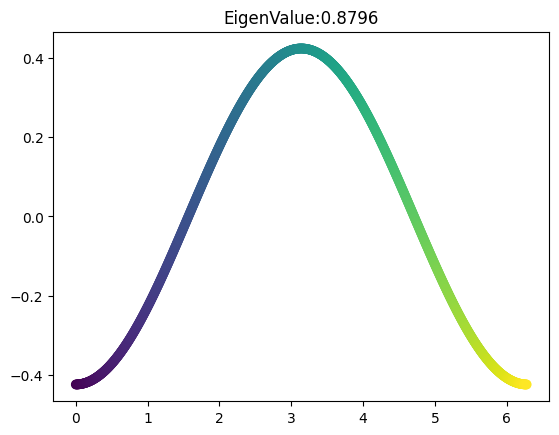

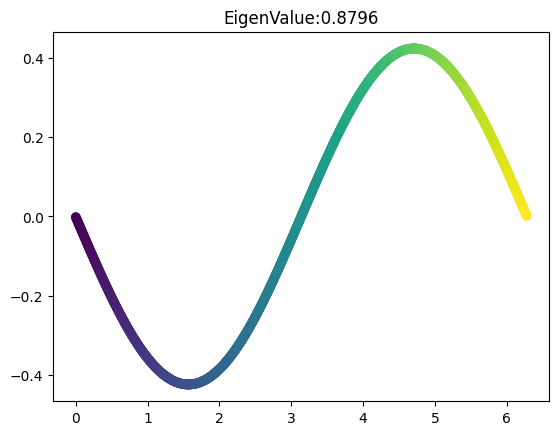

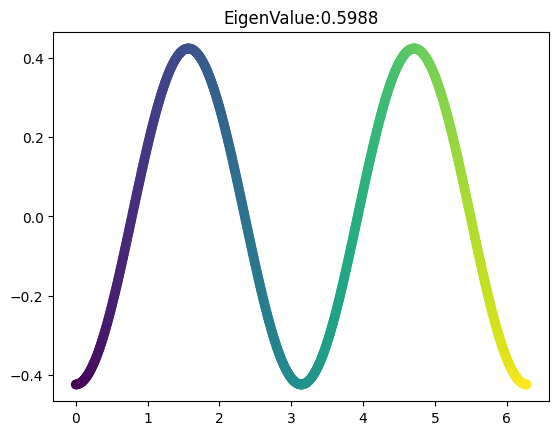

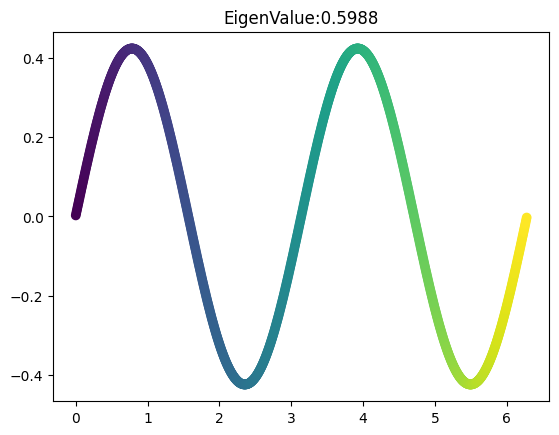

In [4]:
lambda_l,phi_l=diffusion_map(X,5)
# Plotting the eigenfun
plot_eigenValues(tk, phi_l, lambda_l, 5)

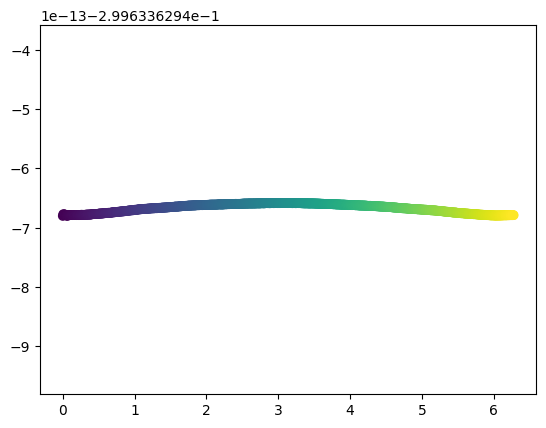

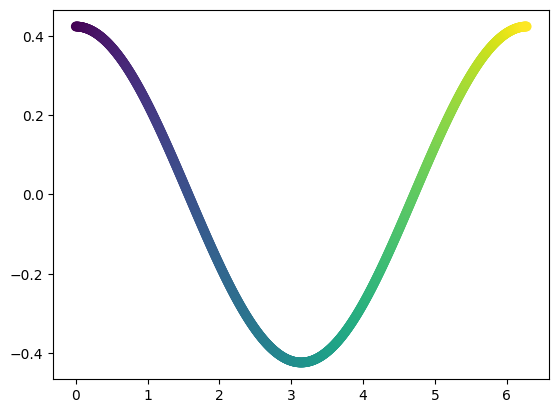

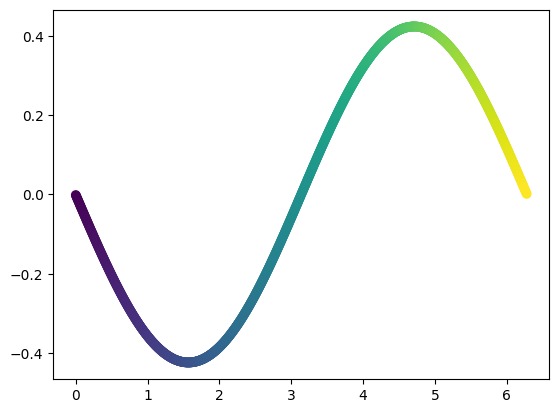

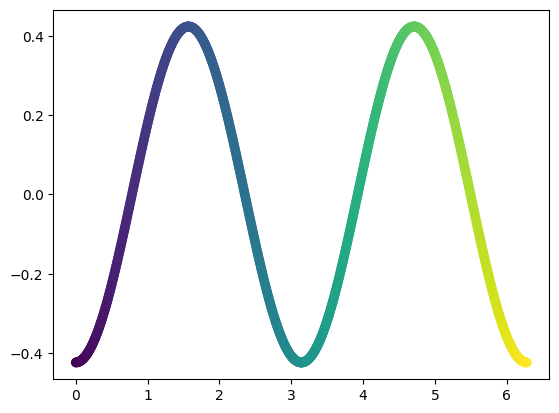

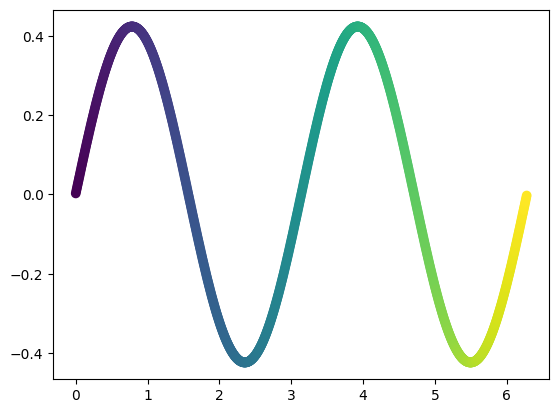

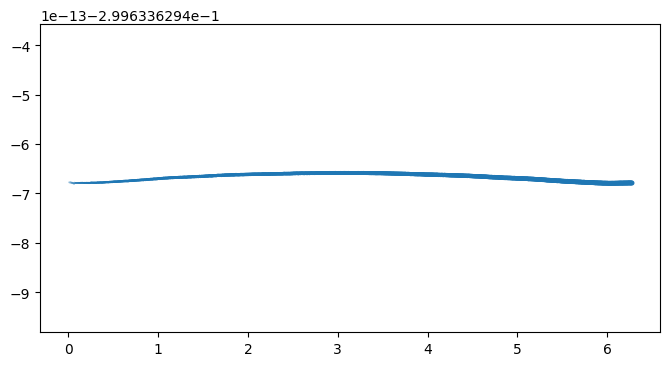

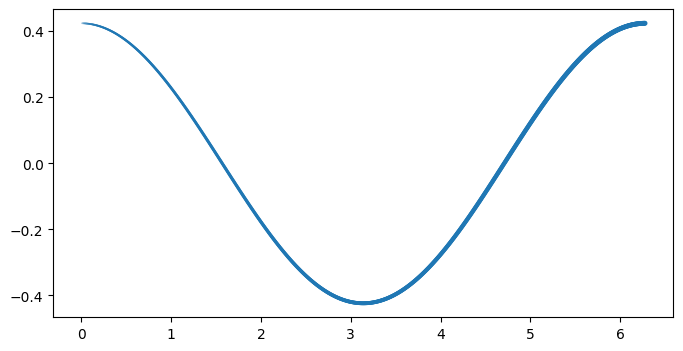

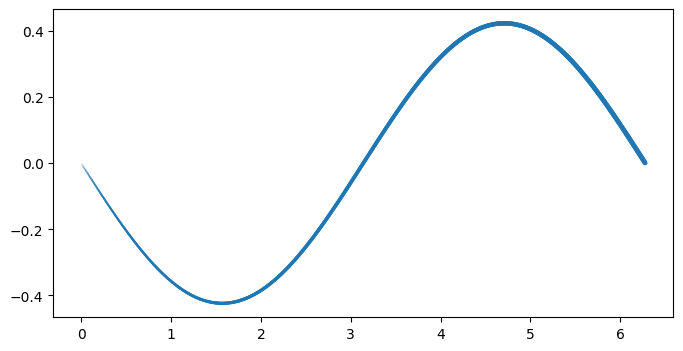

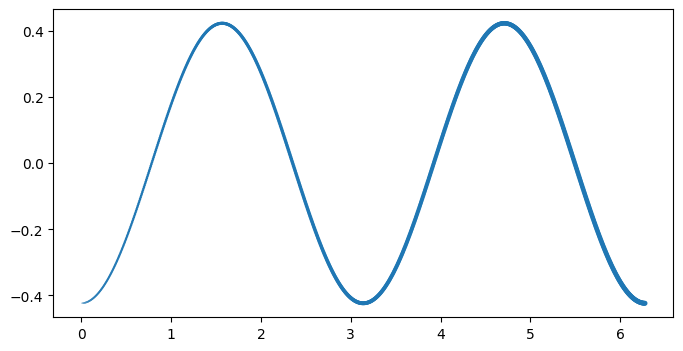

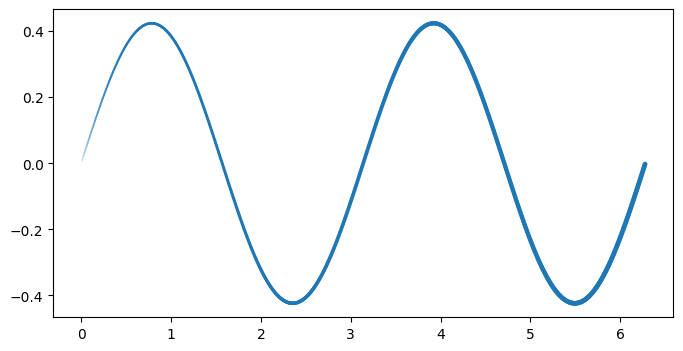

In [7]:
for i in range(5):
    fig = plt.figure(figsize=(8, 4))  # Adjust figure size as needed
    ax = fig.add_subplot()
    ax.scatter(tk, phi_l[:,i],tk)
    plt.show()
